#**Personalized Workout Recommender**



-Python Notebook: Hugging Face Text-to-Text Pipeline Without Gradio


---


- This project aims to create a personalized workout recommender system based on user input. Users describe their day and select a time of day (morning, afternoon, evening). Based on their mood and the time, the system suggests suitable workouts. The project uses Hugging Face’s sentiment analysis to classify the input text and a DataFrame to store possible workout suggestions




# 1. Setup and Dependencies

In [54]:
!pip install transformers pandas matplotlib

In [55]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt


# 2. Text Classification Using Hugging Face

In [56]:
classifier = pipeline('sentiment-analysis',model='distilbert-base-uncased-finetuned-sst-2-english')

def analyze_sentiment(text):
    result = classifier(text)[0]
    print(f"Classifier result: {result}")
    return result['label']

# Test with an example user input
user_input = "I had a stressful day, feeling really tired and unmotivated."
sentiment = analyze_sentiment(user_input)
print(f"User sentiment: {sentiment}")


Classifier result: {'label': 'NEGATIVE', 'score': 0.9993523955345154}
User sentiment: NEGATIVE


# 3. Creating a Workout DataFrame

In [57]:
# Define workout recommendations based on mood and time of day
data = {
    'Mood': ['POSITIVE', 'NEGATIVE'],
    'Morning': ['Yoga', 'Stretching'],
    'Afternoon': ['HIIT', 'Strength Training'],
    'Evening': ['Meditation', 'Relaxing Walk']
}

workout_df = pd.DataFrame(data)

# Display the DataFrame
print(workout_df)

       Mood     Morning          Afternoon        Evening
0  POSITIVE        Yoga               HIIT     Meditation
1  NEGATIVE  Stretching  Strength Training  Relaxing Walk


# 4. Combining Sentiment and Time for Workout Recommendation

In [58]:
df = pd.DataFrame(columns=['Mood', 'Morning', 'Afternoon', 'Evening'])

# Function to append user input to the DataFrame
def append_user_input(df, sentiment, time_of_day, workout):
    # Ensure proper capitalization of the time_of_day for column names
    time_of_day_mapping = {
        'morning': 'Morning',
        'afternoon': 'Afternoon',
        'evening': 'Evening'
    }
    time_of_day_formatted = time_of_day_mapping[time_of_day.lower()]

    # Create a new row with the specified workout at the appropriate time
    new_row = pd.DataFrame([{'Mood': sentiment, 'Morning': None, 'Afternoon': None, 'Evening': None}])
    new_row[time_of_day_formatted] = workout  # Update the specific time column with the workout
    df = pd.concat([df, new_row], ignore_index=True)
    return df


In [62]:
def recommend_workout(sentiment, time_of_day):
    if time_of_day.lower() == 'morning':
        return workout_df.loc[workout_df['Mood'] == sentiment, 'Morning'].values[0]
    elif time_of_day.lower() == 'afternoon':
        return workout_df.loc[workout_df['Mood'] == sentiment, 'Afternoon'].values[0]
    else:
        return workout_df.loc[workout_df['Mood'] == sentiment, 'Evening'].values[0]

def process_user_input(df):
    # Get user input
    user_input = input("Describe your day: ")
    time_of_day = input("What time of day is it? (Morning, Afternoon, Evening): ")

    # Analyze sentiment
    sentiment = analyze_sentiment(user_input)

    # Recommend a workout
    recommended_workout = recommend_workout(sentiment, time_of_day)

    # Append to the DataFrame
    df = append_user_input(df, sentiment, time_of_day, recommended_workout)

    # Print the recommended workout
    print(f"Recommended workout: {recommended_workout}")
    return df


df = process_user_input(df)


Describe your day: bad
What time of day is it? (Morning, Afternoon, Evening): afternoon
Classifier result: {'label': 'NEGATIVE', 'score': 0.999782383441925}
Recommended workout: Strength Training


In [63]:
def print_dataframe(df):
    print("\nUpdated Workout DataFrame:")
    print(df)
print_dataframe(df)



Updated Workout DataFrame:
       Mood Morning          Afternoon     Evening
0  POSITIVE    None               None  Meditation
1  POSITIVE    Yoga               None        None
2  NEGATIVE    None  Strength Training        None


# 5. Adding a Sentiment Distribution Graph

---




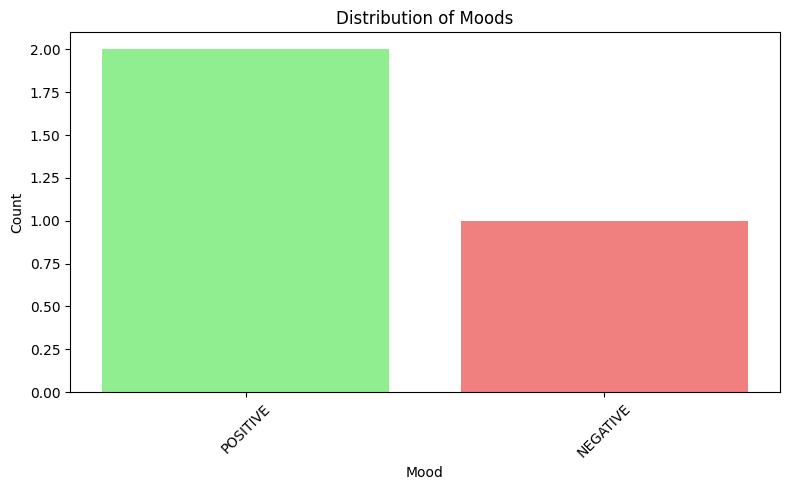

In [64]:
import matplotlib.pyplot as plt

def plot_mood_distribution(df):
    mood_counts = df['Mood'].value_counts()

    # Define custom color palette
    color_palette = {
        'NEGATIVE': 'lightcoral',
        'POSITIVE': 'lightgreen'
    }

    # Map colors to moods
    colors = [color_palette[mood] for mood in mood_counts.index]

    # Create a bar plot
    plt.figure(figsize=(8, 5))
    plt.bar(mood_counts.index, mood_counts.values, color=colors)
    plt.title('Distribution of Moods')
    plt.xlabel('Mood')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_mood_distribution(df)

<ipython-input-65-5ab0342fb1d5>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values, palette=custom_palette)


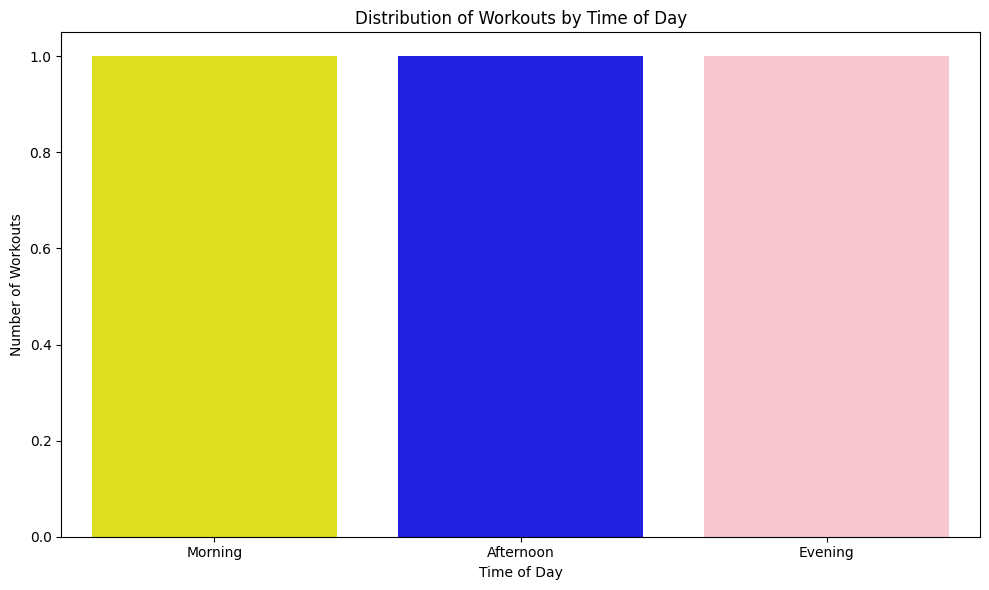

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_workout_distribution(df):
    df_melted = df.melt(id_vars=['Mood'], value_vars=['Morning', 'Afternoon', 'Evening'],
                        var_name='Time of Day', value_name='Workout')

    # Remove rows with NaN in 'Workout'
    df_melted = df_melted.dropna(subset=['Workout'])

    # Count occurrences of workouts by time of day
    time_of_day_counts = df_melted['Time of Day'].value_counts()

    # Define custom color palette
    custom_palette = {
        'Morning': 'yellow',
        'Afternoon': 'blue',
        'Evening': 'pink'
    }

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values, palette=custom_palette)
    plt.title('Distribution of Workouts by Time of Day')
    plt.xlabel('Time of Day')
    plt.ylabel('Number of Workouts')
    plt.tight_layout()
    plt.show()

plot_workout_distribution(df)